# Jupyter Notebook for GaussianNB
Auto-generated notebook.

http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf


In [1]:
import pandas as pd
import numpy as n
import pandas as pd
import numpy as np
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 

from sklearn.naive_bayes import GaussianNB
from sklearn import datasets 
from erudition.learning.modules.sklearn.GeneralizedLinearModels.helper import helper
from erudition.learning.helpers.plots.plotly_render import render, scatter#

#pd.options.display.float_format = '{:,.2g}'.format
#np.random.seed(42)


In [2]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

df=pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
df['iris_type'] = y

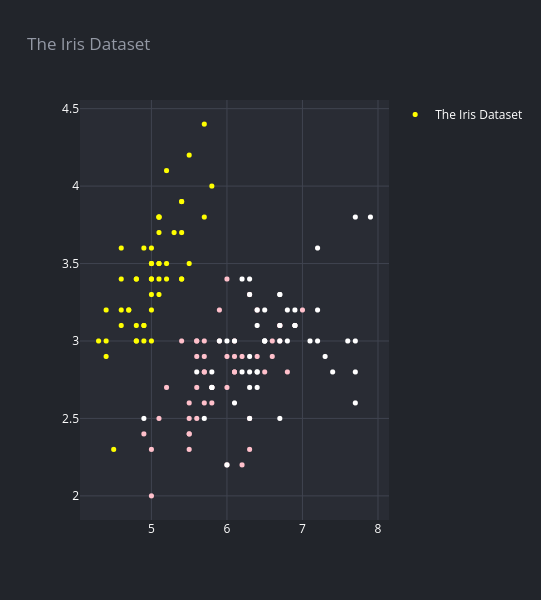

In [4]:
fig = go.Figure(data=[scatter(df.sepal_length, df.sepal_width, 'The Iris Dataset', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'white'][a] for a in df.iris_type])])
render(fig, title='The Iris Dataset', height=600, width=600)

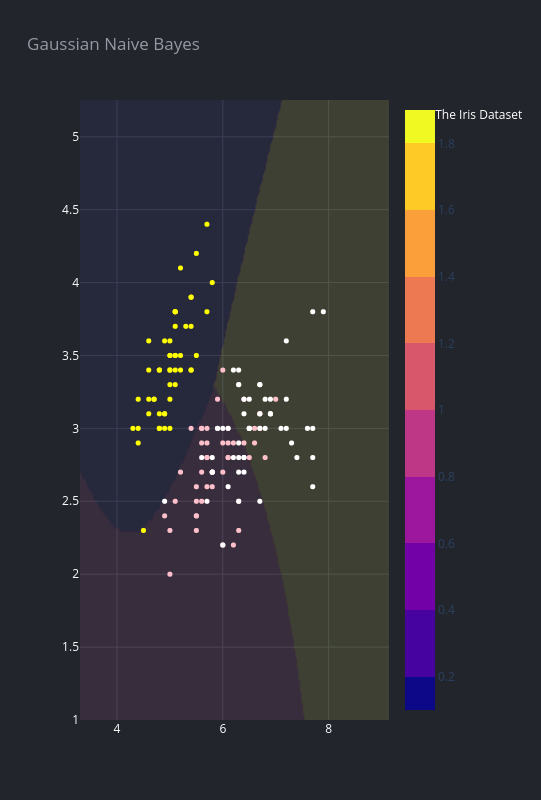

In [5]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
    )

gnb = GaussianNB().fit(X, y)
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = go.Figure(data=[
    scatter(df.sepal_length, df.sepal_width, 'The Iris Dataset', mode='markers', size=5, opacity=1, color = [['yellow', 'pink', 'white'][a] for a in df.iris_type]),
    go.Contour(
        z=Z,
        x=np.linspace(x_min, x_max-1, Z.shape[0]),
        y=np.linspace(y_min, y_max+1, Z.shape[1]),
        #contours_coloring='lines',
        opacity=0.1,
        line_width=0,
    )
    ])
render(fig, title='Gaussian Naive Bayes', height=800, width=800)

# Understanding Gaussian Naive Bayes

In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.

Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

Naive Bayes is a simple technique for **constructing classifiers**: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set.

The formula is defined as:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

All naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

## It's very useful
Despite the fact that the far-reaching independence assumptions are often inaccurate, the naive Bayes classifier has several properties that make it surprisingly useful in practice. In particular, the decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one-dimensional distribution. This helps alleviate problems stemming from the curse of dimensionality, such as the need for data sets that scale exponentially with the number of features. While naive Bayes often fails to produce a good estimate for the correct class probabilities, this may not be a requirement for many applications. For example, the naive Bayes classifier will make the correct MAP decision rule classification so long as the correct class is more probable than any other class. This is true regardless of whether the probability estimate is slightly, or even grossly inaccurate. In this manner, the overall classifier can be robust enough to ignore serious deficiencies in its underlying naive probability model.

# Simple Worked Example

Problem: classify whether a given person is a male or a female based on the measured features. The features include height, weight, and foot size.

In [83]:
data = [
    ['male',   6.00, 180, 12],
    ['male',   5.92, 190, 11],
    ['male',   5.58, 170, 12],
    ['male',   5.92, 165, 10],
    ['female', 5.00, 100, 6],
    ['female', 5.50, 150, 8],
    ['female', 5.42, 130, 7],
    ['female', 5.75, 150, 9]
]

df = pd.DataFrame(data, columns=['Person', 'Height', 'Weight', 'FootSize'])
df

,Person,Height,Weight,FootSize
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [111]:
male_means = df[df.Person == 'male'].mean()
male_vars  = df[df.Person == 'male'].var()

female_means = df[df.Person == 'female'].mean()
female_vars  = df[df.Person == 'female'].var()

dfx = pd.concat(
    [
        pd.concat([pd.DataFrame(male_means), pd.DataFrame(male_vars)]).T,
        pd.concat([pd.DataFrame(female_means), pd.DataFrame(female_vars)]).T
    ]
)

dfx.columns = ['Height_Mean', 'Weight_Mean','FootSize_Mean','Height_Var','Weight_Var','FootSize_var']
dfx = dfx.reset_index(drop=True)
dfx

,Height_Mean,Weight_Mean,FootSize_Mean,Height_Var,Weight_Var,FootSize_var
0,5.86,176.25,11.25,0.04,122.92,0.92
1,5.42,132.50,7.50,0.10,558.33,1.67


$posterior = \frac{prior \, x \, likelihood}{evidence}$

In [114]:
# We have the following we would like to classify as either male of female

data = [['sample', 6, 130, 8]]
df_sample = pd.DataFrame(data, columns=['Person', 'Height', 'Weight', 'FootSize'])
df_sample

,Person,Height,Weight,FootSize
0,sample,6,130,8


We wish to determine which posterior is greater, male or female. For the classification as male the posterior is given by:

$$posterior(m) = \frac{p(m)p(height|m)p(weight|m)p(footsize|m)}{evidence}$$

and for a femala the posterior is given by:

$$posterior(f) = \frac{p(f)p(height|f)p(weight|f)p(footsize|f)}{evidence}$$

we can state that

$$p(m) = p(f) = 0.5

$$evidence = p(m)p(height|m)p(weight|m)p(footsize|m) + p(f)p(height|f)p(weight|f)p(footsize|f) $$


To calculate the conditional probability parts we now use the naive bayes gaussian algorithm

## The Gaussian Naive Bayes Algorithm

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

for example, p(height|m) can be defined as:

$$P(height \mid male) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(6 - \mu_y)^2}{2\sigma^2_y}\right)$$

and we have the previously calculated values for the mean and variance that can be inserted

$$P(height \mid male) = \frac{1}{\sqrt{2\pi\,x\,122.92^2}} \exp\left(-\frac{(6 - 5.86)^2}{122.92^2}\right)$$

If you plug in all the numbers the posterior numerator for posterior(female) it is larger than the posterior(male) value indicating the sample is likely to be female

